In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from keras.optimizers import SGD, RMSprop
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = image.load_img("/content/drive/MyDrive/Ergin_dataset/test/y_3.jpg") 

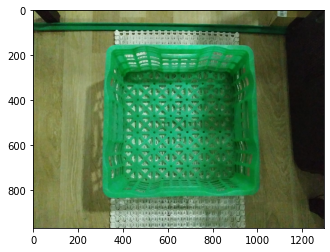

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread("/content/drive/MyDrive/Ergin_dataset/test/y_3.jpg").shape

(970, 1296, 3)

In [ ]:
train = ImageDataGenerator(rescale= 1/50)
validation = ImageDataGenerator(rescale= 1/50)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Ergin_dataset/train',
                                          target_size= (1000,1000),
                                          batch_size = 3,
                                          class_mode = 'binary')

validation_dataset = train.flow_from_directory('/content/drive/MyDrive/Ergin_dataset/validation',
                                          target_size= (1000,1000),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 25 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(8,(3,3),activation = 'relu', input_shape =(1000,1000,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation = 'relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                  ])

In [ ]:
model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr=0.01),
              metrics = ['accuracy'])
             

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 5,
                      epochs = 600,
                      validation_data = validation_dataset)


Epoch 1/600
5/5 [==============================] - 29s 7s/step - loss: 4071.9790 - accuracy: 0.6154 - val_loss: -124.0982 - val_accuracy: 0.5200
Epoch 2/600
5/5 [==============================] - 25s 5s/step - loss: 7732.5630 - accuracy: 0.3077 - val_loss: 49.1481 - val_accuracy: 0.4800
Epoch 3/600
5/5 [==============================] - 25s 5s/step - loss: 22247.7324 - accuracy: 0.3077 - val_loss: -1985.1892 - val_accuracy: 0.5600
Epoch 4/600
5/5 [==============================] - 25s 5s/step - loss: -963.8124 - accuracy: 0.3846 - val_loss: 572.3232 - val_accuracy: 0.4000
Epoch 5/600
5/5 [==============================] - 28s 6s/step - loss: -674.8024 - accuracy: 0.5333 - val_loss: -5879.9126 - val_accuracy: 0.5200
Epoch 6/600
5/5 [==============================] - 28s 6s/step - loss: -374.9688 - accuracy: 0.4000 - val_loss: 35588.2148 - val_accuracy: 0.4000
Epoch 7/600
5/5 [==============================] - 25s 5s/step - loss: -15706.2451 - accuracy: 0.3077 - val_loss: -286553.7500 - 

In [ ]:
validation_dataset.class_indices

{'beyaz_kasa': 0, 'mavi_kasa': 1, 'yesil_kasa': 2}

In [ ]:
dir_path = '/content/drive/MyDrive/Ergin_dataset/test/'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+''+i,target_size=(1000,1000))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        print('beyaz')
    elif val==1:
        print('yesil')
    else:
        print('mavi')
        break
           